In [4]:
import pandas as pd

# Load dataset (include the folder name)
df = pd.read_excel("data set raw/online_retail_II.xlsx")

# See first few rows
df.head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
import os

# Show the current working directory (where Jupyter is running)
os.getcwd()


'C:\\Users\\jackl\\Documents\\DATA ANALYSIS\\PORTFOLIO\\ecommerce python project'

In [5]:
# Get a quick summary of the data
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df.columns = ['Invoice', 'StockCode', 'Description', 'Quantity', 
              'InvoiceDate', 'Price', 'CustomerID', 'Country']


In [7]:
# Remove any invoices that start with 'C' (these are cancellations)
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Keep only positive quantity and price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [8]:
df = df.dropna(subset=['CustomerID'])


In [9]:
df['Sales'] = df['Quantity'] * df['Price']



In [10]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
Index: 407664 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  int64         
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   CustomerID   407664 non-null  float64       
 7   Country      407664 non-null  object        
 8   Sales        407664 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


,Quantity,InvoiceDate,Price,CustomerID,Sales
count,407664.000000,407664,407664.000000,407664.000000,407664.000000
mean,13.585585,2010-07-01 10:15:11.871688192,3.294438,15368.592598,21.664909
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000,4.950000
50%,5.000000,2010-07-09 15:47:00,1.950000,15321.000000,11.900000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000,19.500000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000
std,96.840747,NaN,34.757965,1679.762138,77.150058


In [11]:
top_countries = (
    df.groupby('Country')['Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
top_countries


Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Sweden              53171.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: Sales, dtype: float64

In [12]:
top_products = (
    df.groupby('Description')['Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
top_products


Description
WHITE HANGING HEART T-LIGHT HOLDER     151624.31
REGENCY CAKESTAND 3 TIER               143893.35
Manual                                  98560.64
ASSORTED COLOUR BIRD ORNAMENT           70493.83
JUMBO BAG RED RETROSPOT                 51759.30
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40186.65
PAPER CHAIN KIT 50'S CHRISTMAS          36933.50
PARTY BUNTING                           35035.90
EDWARDIAN PARASOL NATURAL               34044.75
Name: Sales, dtype: float64

C:\Users\jackl\AppData\Local\Temp\ipykernel_8804\446125387.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Sales']


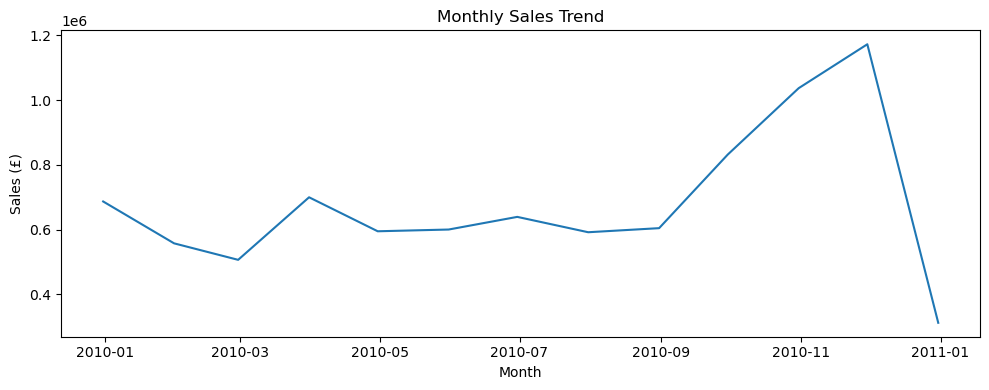

In [13]:
monthly_sales = (
    df.set_index('InvoiceDate')
      .resample('M')['Sales']
      .sum()
      .reset_index()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.tight_layout()
plt.show()


In [14]:
print("Top 10 countries by sales:\n", top_countries)
print("\nTop 10 products by sales:\n", top_products)


Top 10 countries by sales:
 Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Sweden              53171.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: Sales, dtype: float64

Top 10 products by sales:
 Description
WHITE HANGING HEART T-LIGHT HOLDER     151624.31
REGENCY CAKESTAND 3 TIER               143893.35
Manual                                  98560.64
ASSORTED COLOUR BIRD ORNAMENT           70493.83
JUMBO BAG RED RETROSPOT                 51759.30
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40186.65
PAPER CHAIN KIT 50'S CHRISTMAS          36933.50
PARTY BUNTING                           35035.90
EDWARDIAN PARASOL NATURAL               34044.75
Name: Sales, dtype: float64


C:\Users\jackl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted sales for next month: £ 808407.93


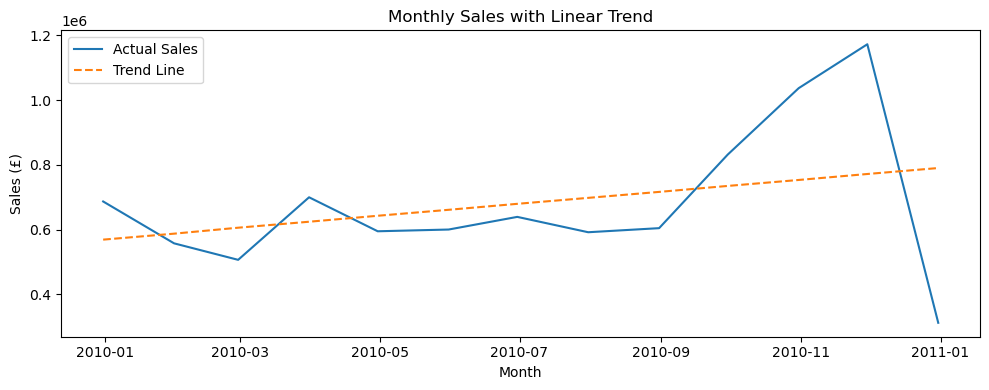

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare monthly sales data again (just in case)
monthly_sales = (
    df.set_index('InvoiceDate')
      .resample('ME')['Sales']   # use 'ME' instead of 'M' to remove the warning
      .sum()
      .reset_index()
)

# Add a time index
monthly_sales['t'] = np.arange(len(monthly_sales))

# Train simple linear regression
X = monthly_sales[['t']]
y = monthly_sales['Sales']
model = LinearRegression()
model.fit(X, y)

# Predict next month (t = N)
next_t = np.array([[len(monthly_sales)]])
next_month_sales = model.predict(next_t)[0]
print("Predicted sales for next month: £", round(next_month_sales, 2))

# Plot with trend line
monthly_sales['Predicted'] = model.predict(X)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Sales'], label='Actual Sales')
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Predicted'], label='Trend Line', linestyle='--')
plt.title('Monthly Sales with Linear Trend')
plt.xlabel('Month'); plt.ylabel('Sales (£)')
plt.legend(); plt.tight_layout()
plt.show()
